# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing datasets

In [2]:
path = r'C:\Users\Aricia\MM-2020 Instacart Basket Analysis'

In [3]:
# Importing merged most up-to-date dataset
ords_prods_cst = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_ords_prods_csts_merged.pkl'))

# Running data checks

In [4]:
#checking output
ords_prods_cst.shape

(32434212, 33)

In [5]:
ords_prods_cst.columns

Index(['user_id', 'Gender', 'State', 'Age', 'date_joined',
       'number_of_dependants', 'marital_status', 'income', 'product_id',
       'product_name', 'aisle_id', 'department_id', 'prices', 'order_id',
       'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered', '_merge',
       'Merge_flag', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spender_type', 'order_frequency', 'order_frequency_flag',
       'Merge_flag49'],
      dtype='object')

In [6]:
ords_prods_cst.head()

,user_id,Gender,State,Age,date_joined,number_of_dependants,marital_status,income,product_id,product_name,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spender_type,order_frequency,order_frequency_flag,Merge_flag49
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regularly busy,Busiest days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regularly busy,Regular days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regularly busy,Busiest days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Regularly busy,Regular days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both


In [7]:
ords_prods_cst.describe()

,user_id,Age,number_of_dependants,income,product_id,aisle_id,department_id,prices,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order,average_price,order_frequency
count,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07
mean,1.029374e+05,4.946521e+01,1.501872e+00,9.943525e+04,2.557778e+04,7.121649e+01,9.922231e+00,1.198114e+01,1.710748e+06,1.714192e+01,2.738810e+00,1.342500e+01,1.032864e+01,8.351176e+00,5.896888e-01,3.305217e+01,1.198114e+01,9.611518e+00
std,5.946649e+04,1.848553e+01,1.118871e+00,4.305473e+04,1.409614e+04,3.820429e+01,6.281190e+00,4.954192e+02,9.872996e+05,1.753489e+01,2.090047e+00,4.246351e+00,8.587155e+00,7.126688e+00,4.918902e-01,2.515449e+01,8.318331e+01,6.280430e+00
min,1.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,1.000000e+00,0.000000e+00,3.000000e+00,1.000000e+00,-1.000000e+00
25%,5.142000e+04,3.300000e+01,1.000000e+00,6.699800e+04,1.353500e+04,3.100000e+01,4.000000e+00,4.200000e+00,8.559450e+05,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00,3.000000e+00,0.000000e+00,1.300000e+01,7.391954e+00,6.000000e+00
50%,1.026125e+05,4.900000e+01,2.000000e+00,9.661200e+04,2.525600e+04,8.300000e+01,9.000000e+00,7.400000e+00,1.711049e+06,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00,6.000000e+00,1.000000e+00,2.600000e+01,7.829438e+00,7.000000e+00
75%,1.543910e+05,6.500000e+01,3.000000e+00,1.279080e+05,3.793500e+04,1.070000e+02,1.600000e+01,1.130000e+01,2.565510e+06,2.400000e+01,5.000000e+00,1.600000e+01,1.400000e+01,1.100000e+01,1.000000e+00,4.700000e+01,8.258696e+00,1.200000e+01
max,2.062090e+05,8.100000e+01,3.000000e+00,5.939010e+05,4.968800e+04,1.340000e+02,2.100000e+01,9.999900e+04,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.450000e+02,1.000000e+00,9.900000e+01,2.500543e+04,3.000000e+01


# Dropping unnecessary columns

In [8]:
# Dropping merge flags check
ords_prods_cst = ords_prods_cst.drop(columns = ['Merge_flag49', '_merge', 'Merge_flag'])

In [9]:
#checking output
ords_prods_cst.shape

(32434212, 30)

# Addressing PII information

No PII columns, as First Name and Surname were dropped on past exercise, due to irrelevant information, since we had user_id.

# Creating a regional segmentation

In [12]:
# Checking state column
ords_prods_cst['State'].unique()

array(['Missouri', 'New Mexico', 'Idaho', 'Iowa', 'Maryland', 'Kentucky',
       'Montana', 'South Carolina', 'Texas', 'Virginia', 'Nevada',
       'Nebraska', 'Georgia', 'Wyoming', 'Colorado', 'North Dakota',
       'Wisconsin', 'Alaska', 'Vermont', 'Arkansas', 'Maine',
       'North Carolina', 'West Virginia', 'Indiana', 'Oregon', 'Florida',
       'California', 'Pennsylvania', 'Ohio', 'Connecticut', 'Arizona',
       'Louisiana', 'Washington', 'New York', 'Mississippi', 'Oklahoma',
       'Utah', 'New Hampshire', 'Hawaii', 'District of Columbia',
       'Alabama', 'Massachusetts', 'Rhode Island', 'Michigan',
       'New Jersey', 'Kansas', 'South Dakota', 'Minnesota', 'Illinois',
       'Tennessee', 'Delaware'], dtype=object)

In [13]:
# Create a region column based on the state
result = []

for value in ords_prods_cst["State"]:
  if value == 'Maine' or value == 'New Hampshire'  or value == 'Vermont' or value == 'Massachusetts' or value == 'Rhode Island' or value == 'Connecticut' or value == 'New York' or value == 'Pennsylvania' or value == 'New Jersey':
    result.append("Region 1 - Northeast")
  elif value == 'Wisconsin' or value == 'Michigan'  or value == 'Illinois' or value == 'Indiana' or value == 'Ohio' or value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas' or value == 'Minnesota' or value == 'Iowa' or value == 'Missouri':
    result.append("Region 2 - Midwest")
  elif value == 'Delaware' or value == 'Maryland'  or value == 'District of Columbia' or value == 'Virginia' or value == 'West Virginia' or value == 'North Carolina' or value == 'South Carolina' or value == 'Georgia' or value == 'Florida' or value == 'Kentucky' or value == 'Tennessee' or value == 'Mississippi'  or value == 'Alabama' or value == 'Oklahoma' or value == 'Texas' or value == 'Arkansas' or value == 'Louisiana':
    result.append("Region 3 - South")
  elif value == 'Idaho' or value == 'Montana'  or value == 'Wyoming' or value == 'Nevada' or value == 'Utah' or value == 'Colorado' or value == 'Arizona' or value == 'New Mexico' or value == 'Alaska' or value == 'Washington' or value == 'Oregon' or value == 'California'  or value == 'Hawaii':
    result.append("Region 4 - West")

In [17]:
ords_prods_cst['Region'] = result

In [18]:
# Checking count
ords_prods_cst['Region'].value_counts(dropna = False)

Region
Region 3 - South        10801610
Region 4 - West          8300445
Region 2 - Midwest       7603810
Region 1 - Northeast     5728347
Name: count, dtype: int64

# Customer behavior in different regions

In [62]:
# Using crosstab
crosstab = pd.crosstab(ords_prods_cst['Region'], ords_prods_cst['spender_type'], dropna = False)

In [21]:
crosstab.to_clipboard()

In [22]:
# Due to small dataset, can be printed directly on Python
print(crosstab)

spender_type          High spender  Low spender
Region                                         
Region 1 - Northeast        108343      5620004
Region 2 - Midwest          156129      7447681
Region 3 - South            210182     10591428
Region 4 - West             160807      8139638


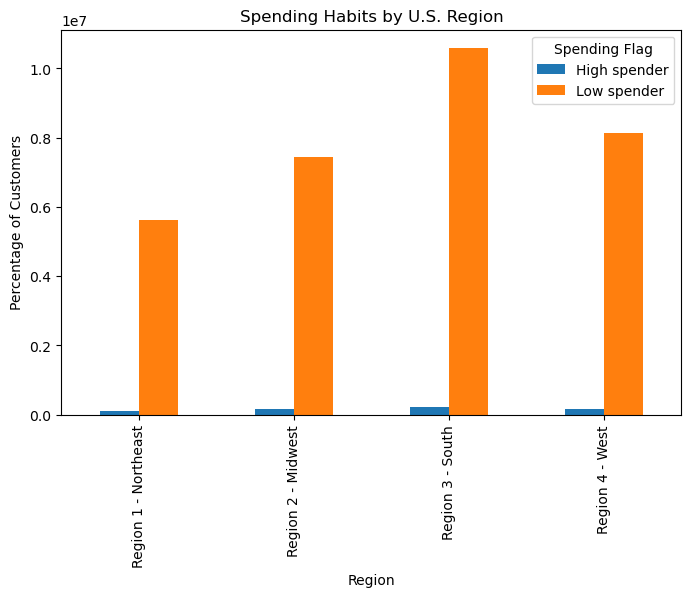

In [97]:
# Creating a chart
bar_region = crosstab.plot(kind="bar", stacked=False, figsize=(8,5))
plt.ylabel("Percentage of Customers")
plt.title("Spending Habits by U.S. Region")
plt.legend(title="Spending Flag")

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="edge")

plt.show()

According to the comparison above, low spender customers drastically outnumber high spender customers in all the regions. Although Midwest has a slightly higher percentage of high spender customers than the others, there's not a significant difference in spending habits between the different U.S. regions, with all four regions ranging from 1.89% and 2.05% of high spenders.

# Exclusion flag for low-activity csts

In [23]:
# Creating exclusion_flag based on max_order
ords_prods_cst.loc[ords_prods_cst['max_order'] < 5, 'customer_activity'] = 'low'
ords_prods_cst.loc[ords_prods_cst['max_order'] >= 5, 'customer_activity'] = 'high'

In [24]:
# Checking flag count. 
ords_prods_cst['customer_activity'].value_counts(dropna = False)

customer_activity
high    30992664
low      1441548
Name: count, dtype: int64

In [26]:
# Creating a dataframe with low_activity csts sample
df_low_activity = ords_prods_cst[ords_prods_cst['customer_activity']=='low']

In [27]:
# Checking new sample
df_low_activity.head()

,user_id,Gender,State,Age,date_joined,number_of_dependants,marital_status,income,product_id,product_name,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spender_type,order_frequency,order_frequency_flag,Region,customer_activity
729,168851,Male,South Carolina,30,1/1/2017,0,single,63712,102,Danish Butter Cookies,...,Regular days,Average orders,3,New customer,7.485714,Low spender,15.0,Regular customer,Region 3 - South,low
730,168851,Male,South Carolina,30,1/1/2017,0,single,63712,130,Vanilla Milk Chocolate Almond Ice Cream Bars M...,...,Regular days,Average orders,3,New customer,7.485714,Low spender,15.0,Regular customer,Region 3 - South,low
731,168851,Male,South Carolina,30,1/1/2017,0,single,63712,130,Vanilla Milk Chocolate Almond Ice Cream Bars M...,...,Slowest days,Average orders,3,New customer,7.485714,Low spender,15.0,Regular customer,Region 3 - South,low
732,168851,Male,South Carolina,30,1/1/2017,0,single,63712,130,Vanilla Milk Chocolate Almond Ice Cream Bars M...,...,Busiest days,Average orders,3,New customer,7.485714,Low spender,15.0,Regular customer,Region 3 - South,low
733,168851,Male,South Carolina,30,1/1/2017,0,single,63712,196,Soda,...,Regular days,Average orders,3,New customer,7.485714,Low spender,15.0,Regular customer,Region 3 - South,low


In [28]:
df_low_activity.shape

(1441548, 32)

## Exporting low_activity sample

In [29]:
df_low_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_customers.pkl'))

## Excluding low_activity csts

In [42]:
# Creating a dataframe without low_activity csts sample
df_high_activity = ords_prods_cst[ords_prods_cst['customer_activity']=='high']

In [31]:
# Checking new sample
df_high_activity.head()

,user_id,Gender,State,Age,date_joined,number_of_dependants,marital_status,income,product_id,product_name,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spender_type,order_frequency,order_frequency_flag,Region,customer_activity
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Busiest days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Region 2 - Midwest,high
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regular days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Region 2 - Midwest,high
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Busiest days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Region 2 - Midwest,high
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Regular days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Region 2 - Midwest,high
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Region 2 - Midwest,high


In [33]:
# Checking new sample
df_high_activity.shape

(30992664, 32)

In [34]:
# Exporting new sample
df_high_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_customers.pkl'))

## Defining profiles

In [37]:
#defining profiles 
#Tiers for profiles:
##Dependents  <= 1 = Small family
##Dependents > 1 = Bigger family
##Income <= 60000 = Lower income
##Income > 60000 and <= 250000 = Mid-income
##Income > 250000 = Higher income
##Age <= 40 = Young
##Age > 40 = Established

def customer_profile(row):
    if row['number_of_dependants'] <= 1 and row['income'] <= 60000 and row['Age'] <= 40:
        return "Young lower-income small family"

    elif row['number_of_dependants'] <= 1 and 60000 < row['income'] <= 250000 and row['Age'] <= 40:
        return "Young mid-income small family"
    
    elif row['number_of_dependants'] <= 1 and row['income'] > 250000 and row['Age'] <= 40:
        return "Young higher-income small family"

    elif row['number_of_dependants'] > 1 and row['income'] <= 60000 and row['Age'] <= 40:
        return "Young lower-income bigger family"

    elif row['number_of_dependants'] > 1 and 60000 < row['income'] <= 250000 and row['Age'] <= 40:
        return "Young mid-income bigger family"
    
    elif row['number_of_dependants'] > 1 and row['income'] > 250000 and row['Age'] <= 40:
        return "Young higher-income bigger family"
    
    elif row['number_of_dependants'] <= 1 and row['income'] <= 60000 and row['Age'] > 40:
        return "Established lower-income small family"

    elif row['number_of_dependants'] <= 1 and 60000 < row['income'] <= 250000 and row['Age'] > 40:
        return "Established mid-income small family"
    
    elif row['number_of_dependants'] <= 1 and row['income'] > 250000 and row['Age'] > 40:
        return "Established higher-income small family"

    elif row['number_of_dependants'] > 1 and row['income'] <= 60000 and row['Age'] > 40:
        return "Established lower-income bigger family"

    elif row['number_of_dependants'] > 1 and 60000 < row['income'] <= 250000 and row['Age'] > 40:
        return "Established mid-income bigger family"
    
    elif row['number_of_dependants'] > 1 and row['income'] > 250000 and row['Age'] > 40:
        return "Established higher-income bigger family"
    
    return "Other"

In [43]:
df_high_activity["customer_profile"] = df_high_activity.apply(customer_profile, axis=1)

C:\Users\Aricia\AppData\Local\Temp\ipykernel_33776\3749611146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_activity["customer_profile"] = df_high_activity.apply(customer_profile, axis=1)


In [44]:
#checking customer_profile
df_high_activity['customer_profile'].value_counts(dropna=False)

customer_profile
Established mid-income bigger family       8743944
Established mid-income small family        8723164
Young mid-income small family              3770451
Young mid-income bigger family             3766200
Young lower-income bigger family           1806385
Young lower-income small family            1782300
Established lower-income bigger family     1111990
Established lower-income small family      1108380
Established higher-income bigger family      75154
Established higher-income small family       71568
Young higher-income small family             17150
Young higher-income bigger family            15978
Name: count, dtype: int64

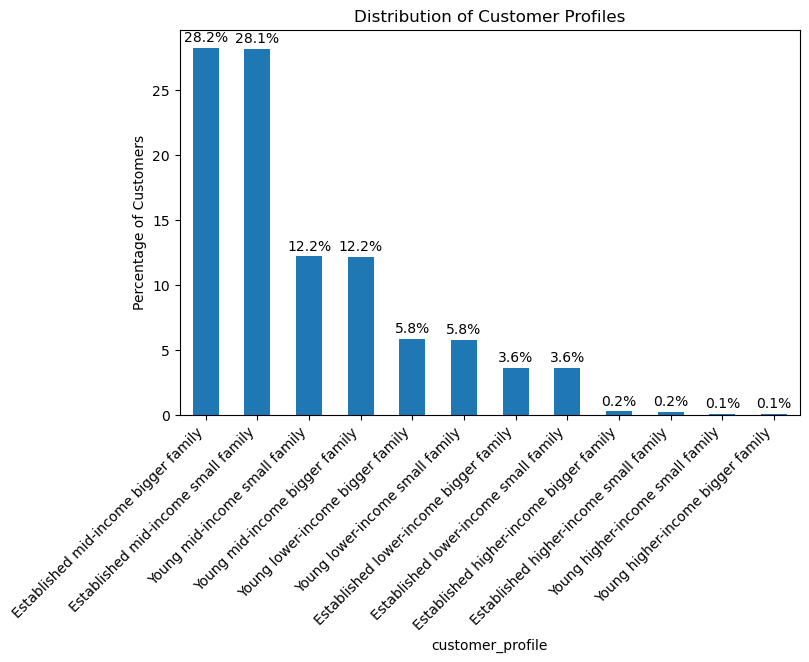

In [115]:
# Creating a bar
bar_profile = df_high_activity['customer_profile'].value_counts(normalize=True) * 100

bar_profiling = bar_profile.plot(kind="bar", figsize=(8,5))
plt.ylabel("Percentage of Customers")
plt.title("Distribution of Customer Profiles")
plt.xticks(rotation=45, ha="right")

for i, v in enumerate(bar_profile):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha="center")

plt.show()

### Aggregate max, mean and min on cst-profile for frequency and expenditure

In [84]:
# Define the aggregation dictionary
aggregation_functions = {
    # Aggregation for Usage Frequency
    'order_frequency': ['max', 'mean', 'min'],
    
    # Aggregation for Expenditure
    'average_price': ['max', 'mean', 'min']
}

# Perform the GroupBy and Aggregate operation
profile_stats = df_high_activity.groupby('customer_profile').agg(aggregation_functions)


In [85]:
# Display the resulting table
print(profile_stats)

                                        order_frequency                  \
                                                    max       mean  min   
customer_profile                                                          
Established higher-income bigger family            30.0   8.431368  1.0   
Established higher-income small family             30.0   8.442516  0.0   
Established lower-income bigger family             30.0  10.045342 -1.0   
Established lower-income small family              30.0   9.735492 -1.0   
Established mid-income bigger family               30.0   9.281933 -1.0   
Established mid-income small family                30.0   9.255553 -1.0   
Young higher-income bigger family                  30.0   8.768495  2.0   
Young higher-income small family                   30.0   9.792187  2.0   
Young lower-income bigger family                   30.0   9.440390 -1.0   
Young lower-income small family                    30.0   9.706084 -1.0   
Young mid-income bigger f

### Crosscheck cst profiling against department_id

In [64]:
crosstab_depart_profile = pd.crosstab(df_high_activity['customer_profile'], df_high_activity['department_id'], dropna = False)

In [65]:
print (crosstab_depart_profile)

department_id                                1     2       3        4      5   \
customer_profile                                                                
Established higher-income bigger family    5822   127    3694    15812   1985   
Established higher-income small family     5084   129    3423    14441   1904   
Established lower-income bigger family    69114  1243   34441   270663   5805   
Established lower-income small family     69091  1298   34238   264908   6104   
Established mid-income bigger family     609459  9415  321662  2619412  36604   
Established mid-income small family      604023  9594  323572  2621794  38454   
Young higher-income bigger family          1339    35     844     3224    498   
Young higher-income small family           1443    48     957     3182    257   
Young lower-income bigger family         122094  1854   63100   502935   8022   
Young lower-income small family          119013  2144   62238   494848   8664   
Young mid-income bigger fami

In [82]:
# Define the Department Grouping - used Data Dictionary from previous exercises
department_mapping = {
    '1': 'Fresh/Perishable', '3': 'Fresh/Perishable', '4': 'Fresh/Perishable', 
    '12': 'Fresh/Perishable', '20': 'Fresh/Perishable',
    
    '5': 'Drinks/Bulk', '7': 'Drinks/Bulk', '10': 'Drinks/Bulk',
    
    '9': 'Staples/Packaged', '13': 'Staples/Packaged', '14': 'Staples/Packaged', 
    '15': 'Staples/Packaged', '16': 'Staples/Packaged',
    
    '11': 'Non-Food/Home', '17': 'Non-Food/Home', '18': 'Non-Food/Home',
    
    '6': 'Specialty/Treats', '8': 'Specialty/Treats', '19': 'Specialty/Treats',
    
    '2': 'Missing/Unknown', '21': 'Missing/Unknown'
}

# Aggregate the Data

# Convert column names (Department IDs 1-21) to strings
crosstab_depart_profile_sorted.columns = crosstab_depart_profile_sorted.columns.astype(str)

# 2a. Rename the columns using the string-based mapping
df_renamed = crosstab_depart_profile_sorted.rename(
    columns=department_mapping,
    inplace=False
)

# 2b. Group the columns by the new group names and sum the values
df_grouped = df_renamed.groupby(df_renamed.columns, axis=1).sum() 


C:\Users\Aricia\AppData\Local\Temp\ipykernel_33776\2985912561.py:30: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_grouped = df_renamed.groupby(df_renamed.columns, axis=1).sum()


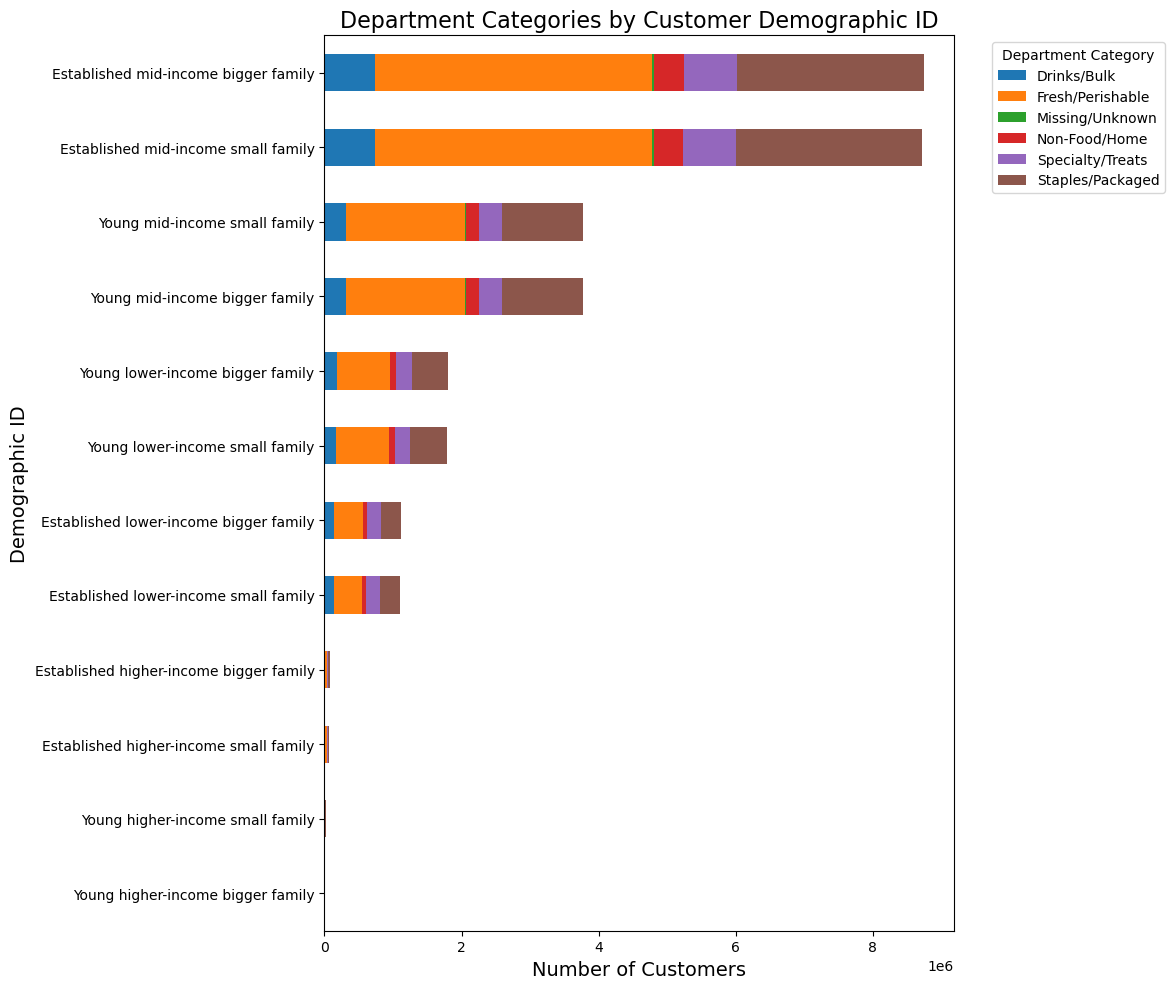

In [111]:
# Create the chart
bar_depart = plt.figure(figsize=(12, 10)) 

df_grouped.plot(
    kind='barh',
    stacked=True,
    ax=plt.gca()
)

# 4. Final Formatting
plt.title("Department Categories by Customer Demographic ID", fontsize=16)
plt.xlabel("Number of Customers", fontsize=14)
plt.ylabel("Demographic ID", fontsize=14)

# Legend
plt.legend(title='Department Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

From the graphic, we can see that our most engaged customers are Established lower-income families, no matter the family size. In addition to it, it's important to notice that the top four drivers are mid-income, which means those are our biggest targets. On the other hand, high-incomes represent almost zero from our sample.
Regarding department category, we can see a trend on most popular departments across all demographic IDs. The fresh and prerishable products, followed by drinks/bulk and staples/packaged are the biggest targets for all groups. 

### Crosscheck cst profiling against region

In [88]:
crosstab_region_profile = pd.crosstab(df_high_activity['customer_profile'], df_high_activity['Region'], dropna = False)

In [89]:
crosstab_region_profile

Region,Region 1 - Northeast,Region 2 - Midwest,Region 3 - South,Region 4 - West
customer_profile,,,,
Established higher-income bigger family,10330,19332,25810,19682
Established higher-income small family,13760,18925,23000,15883
Established lower-income bigger family,194568,254693,381758,280971
Established lower-income small family,199873,258732,366983,282792
Established mid-income bigger family,1561479,2036764,2893733,2251968
Established mid-income small family,1534231,2085694,2850805,2252434
Young higher-income bigger family,1587,3075,7271,4045
Young higher-income small family,3043,7254,4621,2232
Young lower-income bigger family,315721,416700,611524,462440


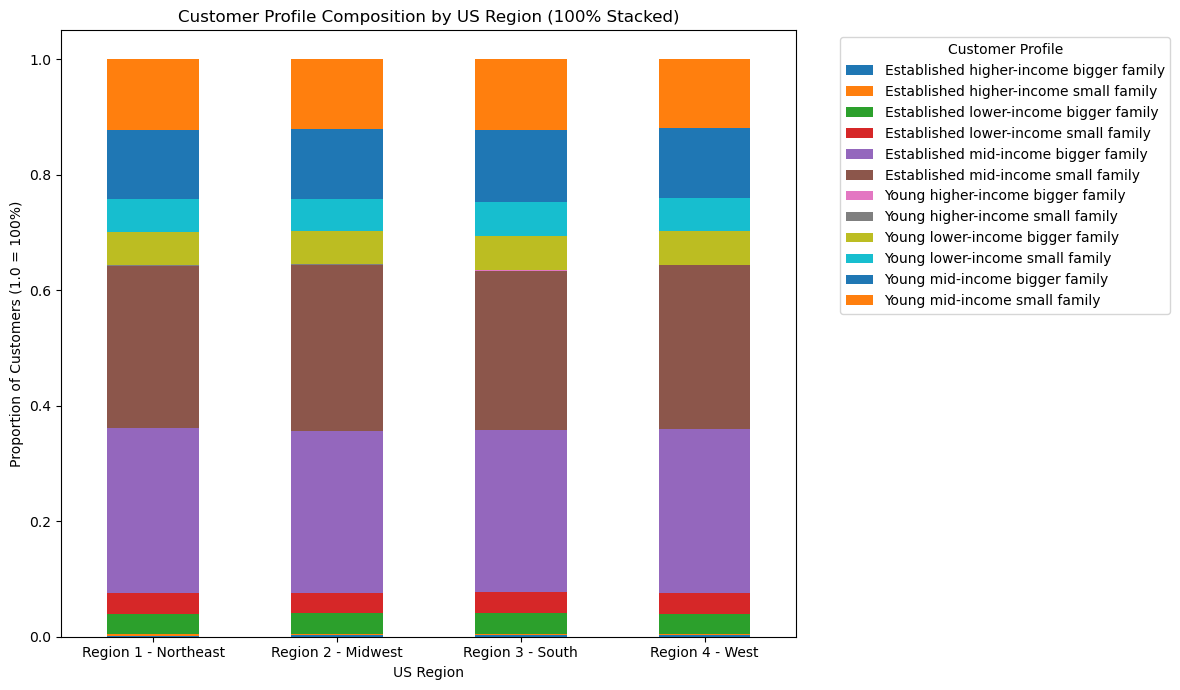

In [110]:
# Building a bar chart
# 100% Stacked - axis=0 ensures that each column (Region) sums to 1.0 (100%)
bar_region1 = crosstab_region_profile.apply(lambda x: x / x.sum(), axis=0)

#  Plot the 100% Stacked Bar Chart ---
fig, ax = plt.subplots(figsize=(12, 7))

# Transpose (.T) the proportion table so Regions are on the X-axis (index)
crosstab_prop.T.plot(kind='bar', stacked=True, ax=ax)

# Add title and labels
ax.set_title('Customer Profile Composition by US Region (100% Stacked)', fontsize=12)
ax.set_xlabel('US Region', fontsize=10)
ax.set_ylabel('Proportion of Customers (1.0 = 100%)', fontsize=10)

# Place the legend outside the plot
ax.legend(title='Customer Profile', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0) # Keep region labels flat and readable
plt.tight_layout()

plt.show()

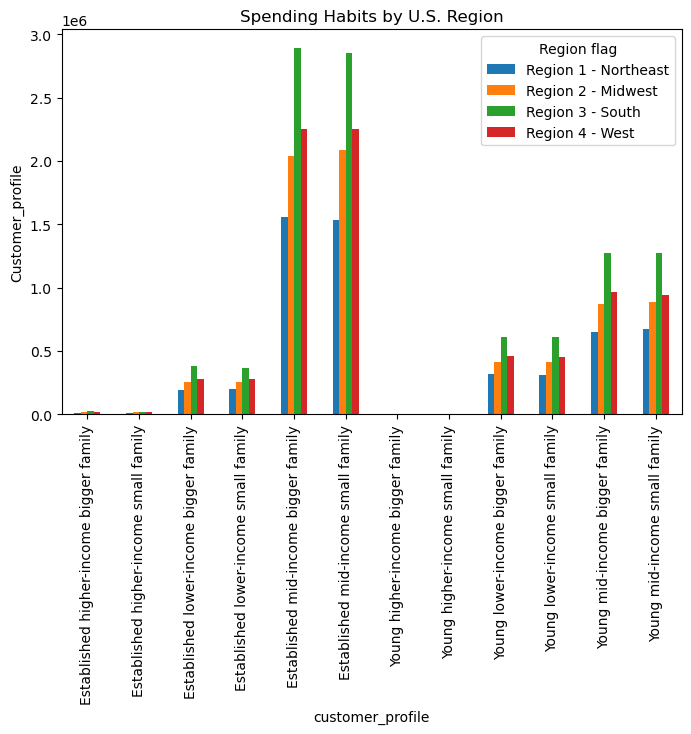

In [98]:
# Dimenaion bar
bar_region2 = crosstab_region_profile.plot(kind="bar", stacked=False, figsize=(8,5))
plt.ylabel("Customer_profile")
plt.title("Spending Habits by U.S. Region")
plt.legend(title="Region flag")

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="edge")

plt.show()

The graphics shows that there is no significant difference on customer profile accross different regions in USA. Although the high majority of grouped cutomers are concentrated in the South region, proportionally, all 4 regions have similar patterns, where their biggest drivers are also Established, mid-income customers. 

## Export visualizations

In [119]:
bar_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_spending_habits_region.png'), bbox_inches='tight')

In [120]:
ax.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profiling_region_100.png'), bbox_inches='tight')

In [121]:
bar_depart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profiling_department.png'), bbox_inches='tight')

In [122]:
bar_profiling.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profiling_customers.png'), bbox_inches='tight')

In [123]:
bar_region2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profiling_region.png'), bbox_inches='tight')

## Checking final data

In [117]:
df_high_activity.head()

,user_id,Gender,State,Age,date_joined,number_of_dependants,marital_status,income,product_id,product_name,...,busiest_period_of_day,max_order,loyalty_flag,average_price,spender_type,order_frequency,order_frequency_flag,Region,customer_activity,customer_profile
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Region 2 - Midwest,high,Established mid-income bigger family
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Region 2 - Midwest,high,Established mid-income bigger family
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Region 2 - Midwest,high,Established mid-income bigger family
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Region 2 - Midwest,high,Established mid-income bigger family
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Region 2 - Midwest,high,Established mid-income bigger family


In [118]:
ords_prods_cst.head()

,user_id,Gender,State,Age,date_joined,number_of_dependants,marital_status,income,product_id,product_name,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spender_type,order_frequency,order_frequency_flag,Region,customer_activity
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Busiest days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Region 2 - Midwest,high
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regular days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Region 2 - Midwest,high
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Busiest days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Region 2 - Midwest,high
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Regular days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Region 2 - Midwest,high
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Region 2 - Midwest,high
